# 29 Calculating Orientations from Strike Lines

The following will demonstrate how to calculate orietations based on strike lines on geological maps. These orientations can be used to create a GemPy model.

<img src="../images/tutorial29_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/29_calculating_orientations_from_strike_lines/'

## Loading Data

A shape file containing the intersection points between topographic contours and layer boundaries is loaded as GeoDataFrame.

In [2]:
import gemgis as gg
import geopandas as gpd
import rasterio 

gdf = gpd.read_file(file_path + 'points_strike.shp')
gdf

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,id,Z,formation,geometry
0,2,400,Ton,POINT (62.513 382.832)
1,3,500,Ton,POINT (141.489 555.155)
2,4,600,Ton,POINT (191.943 720.949)
3,5,700,Ton,POINT (287.541 893.302)
4,5,700,Ton,POINT (481.908 893.302)
5,4,600,Ton,POINT (594.500 720.942)
6,3,500,Ton,POINT (684.515 555.153)
7,1,300,Ton,POINT (807.441 213.514)
8,1,300,Ton,POINT (878.392 213.516)
9,2,400,Ton,POINT (927.489 382.827)


Loading the raster containing the geological map.

In [3]:
raster = rasterio.open(file_path + 'raster.tif')

## Plotting the data

It can be seen that the loaded points are equal to the intersections between contour lines and layer boundaries.

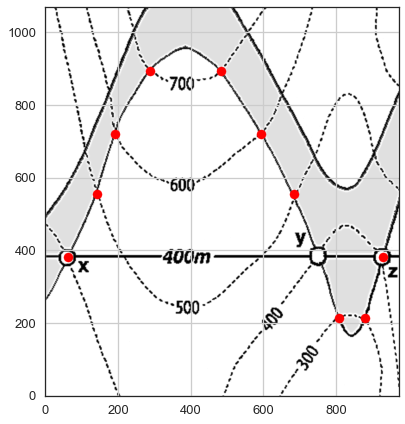

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

ax.imshow(raster.read(1), extent=[0,972,0,1069], cmap='gray')

gdf.plot(ax=ax, aspect='equal', color='red')

plt.grid()

## Creating LineStrings from Points

LineStrings are created from the points to create strike lines.

In [5]:
gdf

,id,Z,formation,geometry
0,2,400,Ton,POINT (62.513 382.832)
1,3,500,Ton,POINT (141.489 555.155)
2,4,600,Ton,POINT (191.943 720.949)
3,5,700,Ton,POINT (287.541 893.302)
4,5,700,Ton,POINT (481.908 893.302)
5,4,600,Ton,POINT (594.500 720.942)
6,3,500,Ton,POINT (684.515 555.153)
7,1,300,Ton,POINT (807.441 213.514)
8,1,300,Ton,POINT (878.392 213.516)
9,2,400,Ton,POINT (927.489 382.827)


In [6]:
linestring_gdf = gg.vector.create_linestring_gdf(gdf=gdf)
linestring_gdf

,index,id,Z,formation,geometry
0,7,1,300,Ton,"LINESTRING (807.441 213.514, 878.392 213.516)"
1,0,2,400,Ton,"LINESTRING (62.513 382.832, 927.489 382.827)"
2,1,3,500,Ton,"LINESTRING (141.489 555.155, 684.515 555.153)"
3,2,4,600,Ton,"LINESTRING (191.943 720.949, 594.500 720.942)"
4,3,5,700,Ton,"LINESTRING (287.541 893.302, 481.908 893.302)"


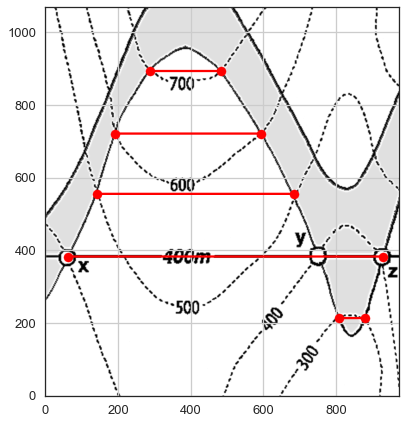

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

ax.imshow(raster.read(1), extent=[0,972,0,1069], cmap='gray')

gdf.plot(ax=ax, aspect='equal', color='red')
linestring_gdf.plot(ax=ax, aspect='equal', color='red')

plt.grid()

## Calculating Orientations

Orientations are calculated for one formation with eigenvector analysis. The orientations are then returned for the midpoint of each strike line and the DataFrame can directly be used for GemPy. Examples with multiple formations follow.

In [8]:
linestring_gdf.is_valid

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [9]:
orientations = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf)
orientations

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.57,180.00,350.00,POINT (668.959 298.172),1.00,Ton,668.96,298.17
1,30.13,180.00,450.00,POINT (454.001 468.992),1.00,Ton,454.00,468.99
2,31.10,180.00,550.00,POINT (403.112 638.050),1.00,Ton,403.11,638.05
3,30.12,180.00,650.00,POINT (388.973 807.124),1.00,Ton,388.97,807.12


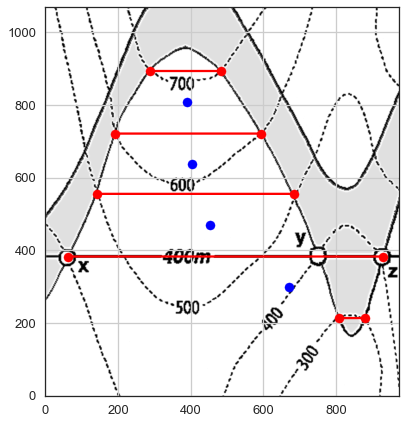

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)

ax.imshow(raster.read(1), extent=[0,972,0,1069], cmap='gray')

gdf.plot(ax=ax, aspect='equal', color='red')
linestring_gdf.plot(ax=ax, aspect='equal', color='red')
orientations.plot(ax=ax, aspect='equal', color='blue')

plt.grid()